In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ase.io import read

# # new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentadienyl'
# # os.chdir(new_path)

[anooja-ThinkPad-X1-Carbon-Gen-11:42687] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


In [ ]:
def create_index_to_atom_mapping(atoms,atom_list):
    """
    Create a mapping of element symbols to their indices in the  list.

    Args:
        atoms: ASE Atoms object containing the atomic structure.
        : List of quantities corresponding to C and N atoms in the same order.

    Returns:
        dict: A dictionary mapping element symbols to their  indices.
    """
    mapping = {}
    index = 0

    for atom in atoms:
        if atom.symbol in atom_list:
            if atom.symbol not in mapping:
                mapping[atom.symbol] = []
            mapping[atom.symbol].append(index)
            index += 1

    return mapping

def plot_atomic_positions(atoms, element_colors):

    fig, ax = plt.subplots(figsize=(10, 10))
    positions = atoms.positions
    x = positions[:, 0]
    y = positions[:, 1]

    colors = [element_colors[atom.symbol] for atom in atoms]

    ax.scatter(x, y, color=colors, s=300)

    for i, (xi, yi, atom) in enumerate(zip(x, y, atoms)):
        ax.text(xi, yi, str(i), color='black', fontsize=9, ha='center', va='center')

    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')

    plt.show()


In [ ]:
atoms = read('dft/device/scatt.xyz')
filtered_atoms = atoms[[atom.symbol not in ['H', 'Au'] for atom in atoms]]
element_colors = {'C': 'cyan', 'N': 'green'}
mapping = create_index_to_atom_mapping(filtered_atoms,atom_list=['C', 'N'])
print(mapping)


{'N': [0, 6], 'C': [1, 2, 3, 4, 5]}


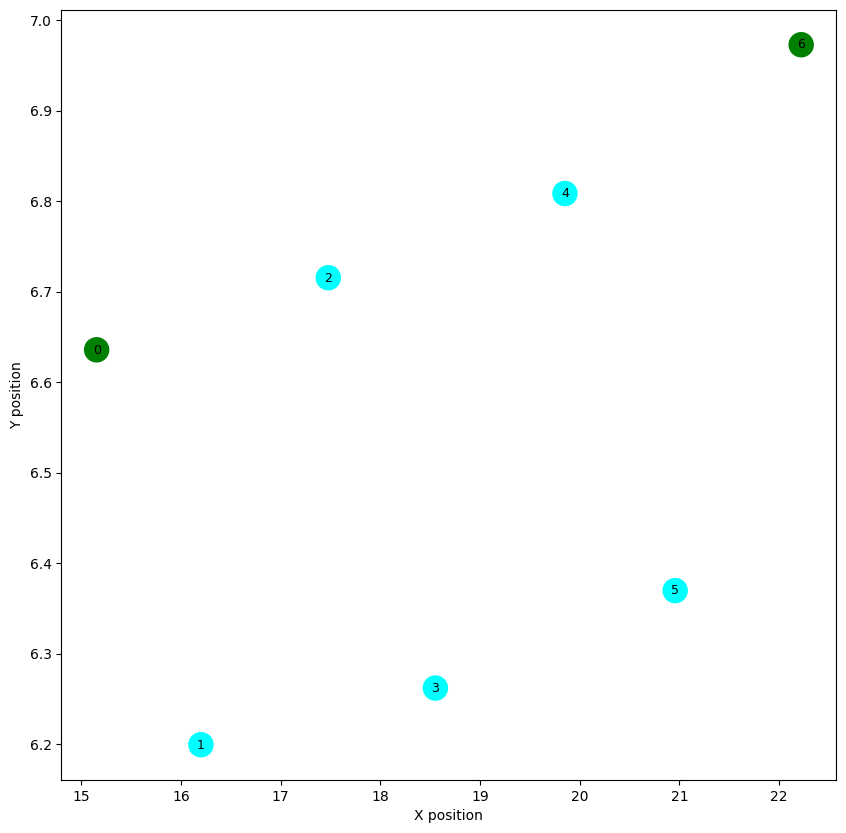

In [9]:
plot_atomic_positions(filtered_atoms, element_colors)